In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [2]:
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'],axis=1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()

In [8]:
df['Species']=encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


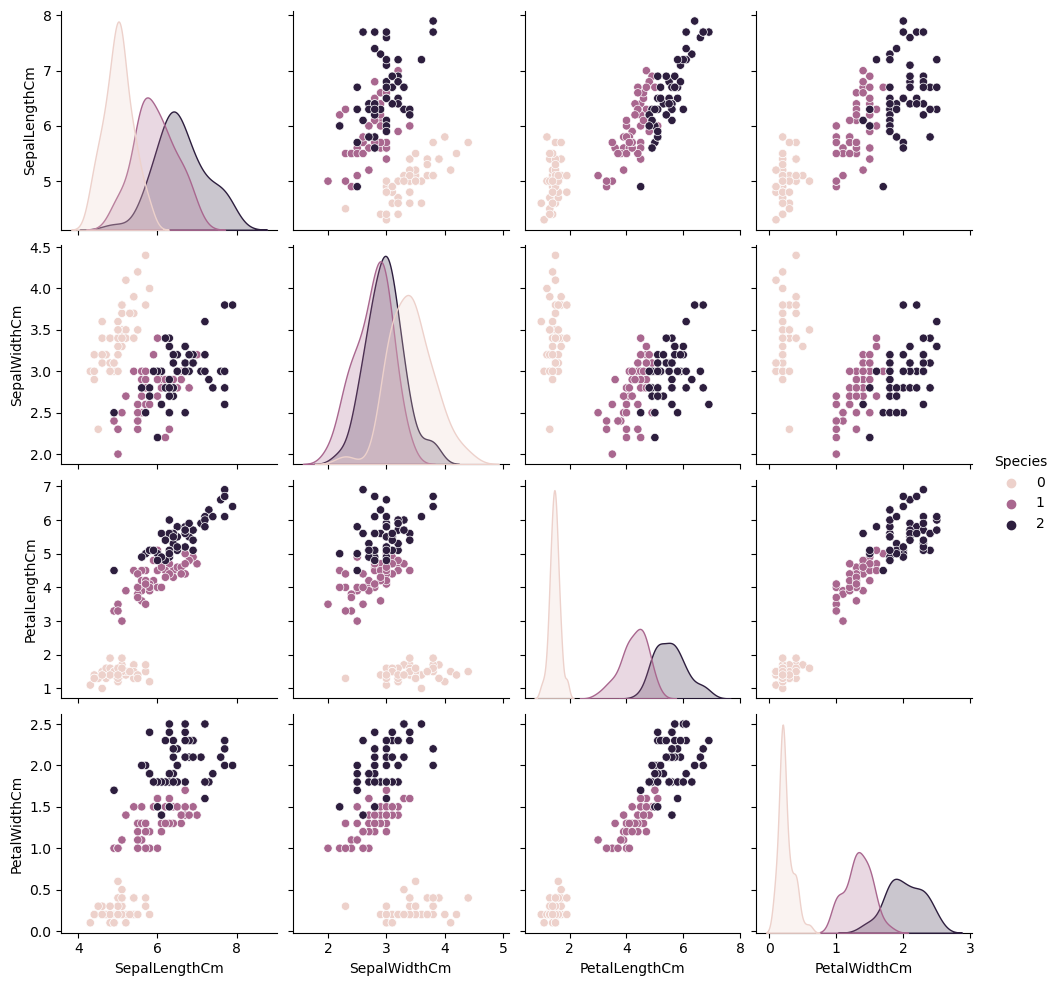

In [12]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [23]:
ndf = df[df['Species']!=0][['SepalLengthCm','SepalWidthCm','Species']]

In [24]:
ndf.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [25]:
ndf.shape

(100, 3)

In [26]:
x=ndf.iloc[:,0:2]
y=ndf.iloc[:,-1]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [31]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=RandomForestClassifier()

In [32]:
estimators=[('lr',clf1),('knn',clf2),('rf',clf3)]

In [33]:
for estimator in estimators:
    s=cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(s),2))

lr 0.75
knn 0.61
rf 0.62


In [34]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [36]:
vc = VotingClassifier(estimators=estimators)
s=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(s),2))

0.68


# Soft Voting

In [37]:
vc = VotingClassifier(estimators=estimators,voting='soft')
s=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(s),2))

0.65


# Weighted Voting

In [38]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            s=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(s),2))
            

for i=1,j=1,k=1 0.66
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.62
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.65
for i=1,j=2,k=3 0.66
for i=1,j=3,k=1 0.62
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.64
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.66
for i=2,j=1,k=3 0.63
for i=2,j=2,k=1 0.67
for i=2,j=2,k=2 0.65
for i=2,j=2,k=3 0.63
for i=2,j=3,k=1 0.65
for i=2,j=3,k=2 0.67
for i=2,j=3,k=3 0.65
for i=3,j=1,k=1 0.73
for i=3,j=1,k=2 0.68
for i=3,j=1,k=3 0.68
for i=3,j=2,k=1 0.7
for i=3,j=2,k=2 0.67
for i=3,j=2,k=3 0.67
for i=3,j=3,k=1 0.68
for i=3,j=3,k=2 0.65
for i=3,j=3,k=3 0.67


# Classifiers of same algorithm

In [40]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

x,y= make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

s1=SVC(probability=True, kernel='poly',degree=1)
s2=SVC(probability=True, kernel='poly',degree=2)
s3=SVC(probability=True, kernel='poly',degree=3)
s4=SVC(probability=True, kernel='poly',degree=4)
s5=SVC(probability=True, kernel='poly',degree=5)

estimators=[('s1',s1),('s2',s2),('s3',s3),('s4',s4),('s5',s5)]

for estimator in estimators:
    s=cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(s),2))

s1 0.85
s2 0.85
s3 0.89
s4 0.81
s5 0.86


In [41]:
vc1=vc = VotingClassifier(estimators=estimators,voting='soft')
s=cross_val_score(vc1,x,y,cv=10,scoring='accuracy')
print(np.round(np.mean(s),2))

0.93
